
<img src="https://mitsloan.mit.edu/sites/default/files/styles/grid_mobile/public/2020-09/logo_thumb_4.png?h=6822f027&itok=cyYow6El" style="float: right ; width: 16%" /> 

# <center> Project A: Financial Data-Science and computing </center>

### <left> Rayen Ayari </left>

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import numpy as np

In [477]:
data=pd.read_csv("spx.csv",header=1)

In [478]:
data.drop(axis=1,columns=['Intra day range ','overnight'],inplace=True)

In [479]:
data.head()

,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,VOLATILITY_30D,CHG_PCT_1D
0,12/30/1927,17.66,17.66,17.66,17.66,NaN,NaN,NaN
1,1/3/1928,17.76,17.76,17.76,17.76,NaN,NaN,0.57
2,1/4/1928,17.72,NaN,17.72,17.72,NaN,NaN,-0.23
3,1/5/1928,17.55,17.55,17.55,17.55,NaN,NaN,-0.96
4,1/6/1928,17.66,17.66,17.66,17.66,NaN,NaN,0.63


In [480]:
## 

In [481]:
data.iloc[13603:]

,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,VOLATILITY_30D,CHG_PCT_1D
13603,4/21/1982,115.48,116.58,114.44,115.72,NaN,16.06,-2.02
13604,4/22/1982,115.72,117.25,115.72,117.19,NaN,16.07,-0.22
13605,4/23/1982,118.02,118.64,117.19,118.64,NaN,15.39,-0.84
13606,4/26/1982,118.94,119.33,118.25,119.26,NaN,15.22,-0.02
13607,4/27/1982,119.07,119.26,117.73,118.00,NaN,14.64,-0.30
...,...,...,...,...,...,...,...,...
24028,8/25/2023,4389.38,4418.46,4356.29,4405.71,929282250.0,23.21,-3.63
24029,8/28/2023,4426.03,4439.56,4414.98,4433.31,729216058.0,23.34,0.57
24030,8/29/2023,4432.75,4500.14,4431.68,4497.63,643786613.0,23.07,0.48
24031,8/30/2023,4500.34,4521.65,4493.59,4514.87,751049645.0,24.77,2.99


In [482]:
data["Dates"]= pd.to_datetime(data["Dates"], format='%m/%d/%Y')

In [483]:
data.Dates

0       1927-12-30
1       1928-01-03
2       1928-01-04
3       1928-01-05
4       1928-01-06
           ...    
24028   2023-08-25
24029   2023-08-28
24030   2023-08-29
24031   2023-08-30
24032   2023-08-31
Name: Dates, Length: 24033, dtype: datetime64[ns]

In [484]:
## Compute number of business days
n=252*(2023-1927+1)-81
print("Required Trading Days: "+str(n))

Required Trading Days: 24363


**Question 1** \
The data range I obtained is  1927-12-30 until 2023-08-31. \
We have 24033 points but we should have got  24363. Thus, the dataset is not complete. 

In [485]:
# Check CHG Price 1 DAY
sum(data["CHG_PCT_1D"].isna())
# We have 333 points for pct change, it is safer to recompute percent change again.

333

In [486]:
data["CHG_PCT_1D"]=data["PX_LAST"].pct_change(1)

In [487]:
data.isna().any()

Dates             False
PX_OPEN           False
PX_HIGH            True
PX_LOW            False
PX_LAST           False
PX_VOLUME          True
VOLATILITY_30D     True
CHG_PCT_1D         True
dtype: bool

In [488]:
## We check nan values 
## We check that high is max of high,open,last
## We check that low is min of min,open,last

In [489]:
np.argwhere(np.isnan(data.PX_HIGH.values))
# We can replace  this high value by the highest in the 2nd row
data.loc[2]

Dates             1928-01-04 00:00:00
PX_OPEN                         17.72
PX_HIGH                           NaN
PX_LOW                          17.72
PX_LAST                         17.72
PX_VOLUME                         NaN
VOLATILITY_30D                    NaN
CHG_PCT_1D                  -0.002252
Name: 2, dtype: object

In [490]:
data["PX_HIGH"].values[2]=data.loc[2]["PX_OPEN"]

In [491]:
## Now, we have
data.isna().any()

Dates             False
PX_OPEN           False
PX_HIGH           False
PX_LOW            False
PX_LAST           False
PX_VOLUME          True
VOLATILITY_30D     True
CHG_PCT_1D         True
dtype: bool

In [492]:
# For the volume, the missing values are filled with 0 and the first chg pct 
data["PX_VOLUME"].fillna(0,inplace=True)
data["CHG_PCT_1D"].fillna(0,inplace=True)

In [493]:
#Now, All the values are filled and the dataset is inconsistent
# The only one for which we couldn't correct without alternative data source is volatility which is normal.

In [498]:
## For the probability we start from 4/21/2023. Before this date, all the high are automatically equal to open
def probability():
    return 100*sum(data.iloc[13603:]["PX_HIGH"]==data.iloc[13603:]["PX_OPEN"])/len(data.iloc[13603:])
print("Prob(P_high=P_open)= {:.2f}%".format(probability()))
def probability4():
    return 100*sum(data.iloc[13603:]["PX_HIGH"]==data.iloc[13603:]["PX_LAST"])/len(data.iloc[13603:])
print("Prob(P_high=P_open)= {:.2f}%".format(probability()))
print("Prob(P_high=P_close)= {:.2f}%".format(probability4()))

Prob(P_high=P_open)= 11.06%
Prob(P_high=P_open)= 11.06%
Prob(P_high=P_close)= 5.88%


In [499]:
## We see big difference thus we reject RW hypothesis.
## We can also confirm it using tests

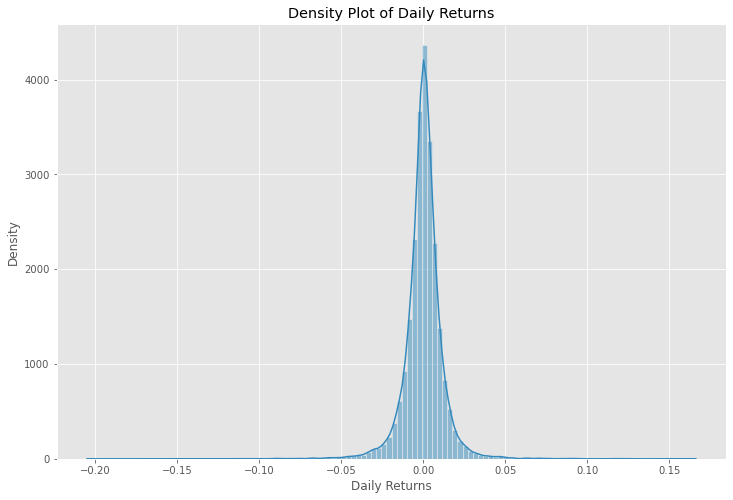

In [126]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(data["CHG_PCT_1D"],bins=120,label="Distribution of S&P 500 Daily Returns 1928-2023",kde=True)
plt.xlabel("Daily Returns")
plt.ylabel("Density")
plt.title("Density Plot of Daily Returns")
plt.show()

In [129]:
## We also perform Shapiro Test 
from scipy import stats
res = stats.shapiro(data["CHG_PCT_1D"].values)
res

ShapiroResult(statistic=0.869862973690033, pvalue=0.0)

In [146]:
res=stats.jarque_bera(data["CHG_PCT_1D"].values)
res

Jarque_beraResult(statistic=292237.8561179863, pvalue=0.0)

In [147]:
# Thus, we reject the RW intraday hypothesis

In [322]:
data["H_t"]= (data["PX_HIGH"]-data["PX_LOW"])/data["PX_LOW"]
data["R_overnight"]= (data["PX_OPEN"].shift(1)-data["PX_LAST"])/data["PX_LAST"]
data["r_t"]=np.log(data["PX_LAST"].shift(1)/data["PX_LAST"])
data["st_dev"]=data["VOLATILITY_30D"]


In [323]:
mask= (data["Dates"]>="1980-01-01") & (data["Dates"]<="2011-08-31")
intra_data=data.loc[mask ].copy()

In [324]:
top_20_values = intra_data["H_t"].nlargest(20)

# Filter the DataFrame to include only rows where "H_t" is in the top 20 values
filtered_data = intra_data[intra_data["H_t"].isin(top_20_values)]

# Sort the filtered DataFrame by the "H_t" column in descending order
sorted_data = filtered_data.sort_values(by="H_t", ascending=False)

# Get the corresponding dates in the sorted order
corresponding_dates = sorted_data["Dates"]
corresponding_dates

14994   1987-10-19
14995   1987-10-20
20309   2008-11-13
20285   2008-10-10
20297   2008-10-28
20284   2008-10-09
20286   2008-10-13
20288   2008-10-15
20314   2008-11-20
20679   2010-05-06
14996   1987-10-21
20289   2008-10-16
20276   2008-09-29
14999   1987-10-26
20320   2008-12-01
20281   2008-10-06
18719   2002-07-24
20293   2008-10-22
20315   2008-11-21
20316   2008-11-24
Name: Dates, dtype: datetime64[ns]

In [325]:
def probability2():
    mask2=(data["Dates"]>="2008-01-09") 
    n=len(corresponding_dates.loc[mask2])
    print(str(n)+" occurred during the final three year sub period out of "+str(len(corresponding_dates)))
probability2()

15 occurred during the final three year sub period out of 20


In [326]:
top_20_values = intra_data["R_overnight"].nlargest(20)

# Get the corresponding dates
positive_dates = intra_data[intra_data["R_overnight"].isin(top_20_values)]["Dates"]

In [327]:
top_20_values

14994    0.325743
14995    0.193683
20314    0.141659
20288    0.112498
20304    0.107152
20282    0.101713
20285    0.099197
20293    0.093245
14999    0.090570
17741    0.089117
20276    0.088649
20284    0.086810
20320    0.086595
17529    0.084037
18151    0.081537
14993    0.079625
20308    0.076088
18717    0.075270
20283    0.073771
20996    0.072196
Name: R_overnight, dtype: float64

In [328]:
# reversed chronological order
positive_dates.iloc[::-1]

20996   2011-08-08
20320   2008-12-01
20314   2008-11-20
20308   2008-11-12
20304   2008-11-06
20293   2008-10-22
20288   2008-10-15
20285   2008-10-10
20284   2008-10-09
20283   2008-10-08
20282   2008-10-07
20276   2008-09-29
18717   2002-07-22
18151   2000-04-14
17741   1998-08-31
17529   1997-10-27
14999   1987-10-26
14995   1987-10-20
14994   1987-10-19
14993   1987-10-16
Name: Dates, dtype: datetime64[ns]

In [329]:
bottom_20_values = intra_data["R_overnight"].nsmallest(20)

# Get the corresponding dates
smallest_dates = intra_data[intra_data["R_overnight"].isin(bottom_20_values)]["Dates"]
smallest_dates 

13689   1982-08-23
13721   1982-10-07
14996   1987-10-21
15003   1987-10-30
18130   2000-03-16
18153   2000-04-18
18722   2002-07-29
18723   2002-07-30
18775   2002-10-11
20270   2008-09-19
20286   2008-10-13
20287   2008-10-14
20297   2008-10-28
20298   2008-10-29
20316   2008-11-24
20317   2008-11-25
20322   2008-12-03
20325   2008-12-08
20387   2009-03-10
20388   2009-03-11
Name: Dates, dtype: datetime64[ns]

In [330]:
## Clearly, it is 2008-2011 period which had the largest number of each

In [331]:
intra_data["j_t"]=intra_data["r_t"]/intra_data["st_dev"]

In [332]:
intra_data["j_t"]=abs(intra_data["j_t"])
top_20_values = intra_data["j_t"].nlargest(20)

# Filter the DataFrame to include only rows where "H_t" is in the top 20 values
filtered_data = intra_data[intra_data["j_t"].isin(top_20_values)]

# Sort the filtered DataFrame by the "H_t" column in descending order
sorted_data = filtered_data.sort_values(by="j_t", ascending=False)

# Get the corresponding dates in the sorted order
corresponding_dates = sorted_data["Dates"]
corresponding_dates

14994   1987-10-19
20276   2008-09-29
20996   2011-08-08
20286   2008-10-13
20297   2008-10-28
20288   2008-10-15
17529   1997-10-27
20994   2011-08-04
20284   2008-10-09
20141   2008-03-18
14715   1986-09-11
20266   2008-09-15
14996   1987-10-21
14999   1987-10-26
20997   2011-08-09
20268   2008-09-17
20998   2011-08-10
20293   2008-10-22
20277   2008-09-30
20999   2011-08-11
Name: Dates, dtype: datetime64[ns]

In [333]:
# The largest jump occured on Black Monday

In [334]:
def probability3():
    mask2=(filtered_data["Dates"]>="2008-01-09") 
    n=len(corresponding_dates.loc[mask2])
    print(str(n)+" occurred during the final three year sub period out of "+str(len(corresponding_dates)))
probability3()

15 occurred during the final three year sub period out of 20


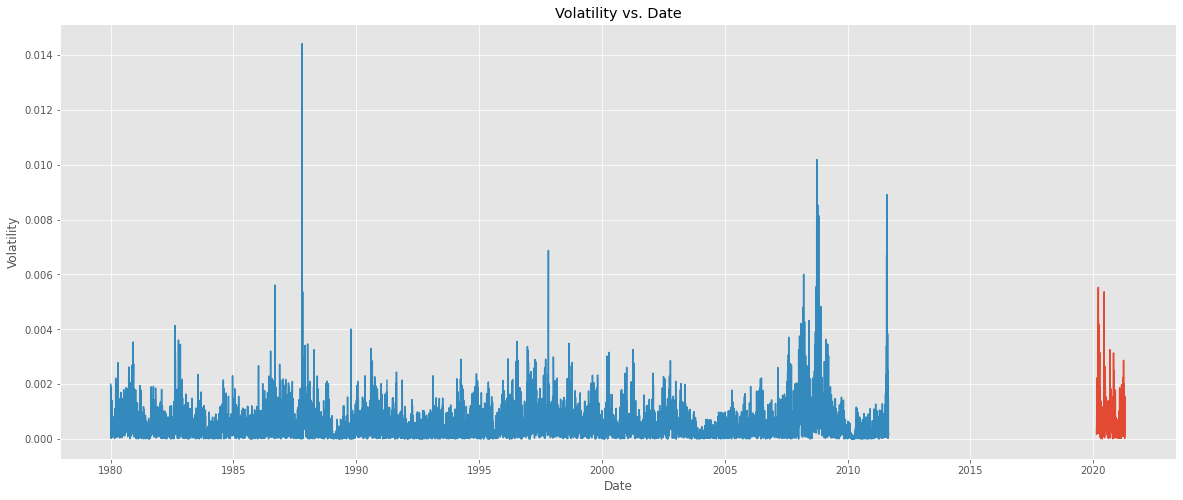

In [340]:
mask_covid= (data["Dates"]>="2020-02-17") & (data["Dates"]<="2021-04-20")
data_covid=data.loc[mask_covid].copy()
data_covid["j_t"]=abs(data_covid["r_t"]/data_covid["st_dev"])
plt.figure(figsize=(20, 8))
plt.plot(data_covid["Dates"], data_covid["j_t"], linestyle='-')
plt.plot(intra_data["Dates"], intra_data["j_t"], linestyle='-')
plt.title('Volatility vs. Date')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)

In [342]:
data.loc[14994]

Dates             1987-10-19 00:00:00
PX_OPEN                         282.7
PX_HIGH                         282.7
PX_LOW                         224.83
PX_LAST                        224.84
PX_VOLUME                         0.0
VOLATILITY_30D                  15.89
CHG_PCT_1D                  -0.204669
H_t                          0.257394
R_overnight                  0.325743
r_t                          0.228997
st_dev                          15.89
Name: 14994, dtype: object

In [346]:
data.loc[23141]

Dates             2020-02-18 00:00:00
PX_OPEN                       3369.04
PX_HIGH                       3375.01
PX_LOW                        3355.61
PX_LAST                       3370.29
PX_VOLUME                 710204239.0
VOLATILITY_30D                  15.85
CHG_PCT_1D                   -0.00292
H_t                          0.005781
R_overnight                  0.002311
r_t                          0.002924
st_dev                          15.85
Name: 23141, dtype: object

In [356]:
## As we see above, the volatility is similar

**Question 2**

In [370]:
mask=(data["Dates"]>="1982-10-06") & (data["Dates"]<="1982-10-07")

In [371]:
data.loc[mask]

,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,VOLATILITY_30D,CHG_PCT_1D,H_t,R_overnight,r_t,st_dev
13720,1982-10-06,122.00,126.97,122.00,126.97,0.0,11.11,0.040908,0.040738,-0.042293,-0.040094,11.11
13721,1982-10-07,125.99,128.96,125.99,128.80,0.0,11.43,0.014413,0.023573,-0.052795,-0.014310,11.43


In [372]:
import yfinance as yf

# Define the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Specify the date for which you want the data (October 6, 1982)
target_date = "1982-10-06"
end_date="1982-10-08"
# Fetch the OHLC data for the specified date using yfinance
sp500_data = yf.download(ticker_symbol, start=target_date, end=end_date)

# Print the data for the specified date
print(sp500_data)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1982-10-06  122.000000  125.970001  122.000000  125.970001  125.970001   
1982-10-07  125.989998  128.960007  125.989998  128.800003  128.800003   

               Volume  
Date                   
1982-10-06   93570000  
1982-10-07  147070000  


In [ ]:
import pandas_datareader as pdr
import datetime

# Define the date for which you want the data (October 6, 1982)
target_date = datetime.datetime(1982, 10, 6)
end_date = datetime.datetime(1982, 10, 7)
pdr.get_data_alphavantage('^GSPC', start=target_date, end=target_date, api_key='CHOXBK2USY1X4R6Q')


In [ ]:
#  I tried also Alpha Vantage, it didn't work
# Yahoo return for October 6th, 1982 is 3.254% but Bloomberg is only 4.074%
# The error was only for the day as they corrected it the following trading day 
# The only other one I found is WSJ which had OHLC = 125.97,126.33,121.82 and 125.97
# The most reasonable value seems Yahoo 

**Question 3**

According to https://benchmark-wealth.com/insights/the-djia-gets-a-major-shakeup-on-august-31st/
the following changes occured:\
We removed: Exxon Mobil, Pfizer and Raytheon Technologies.\
We added: Salesforce, Amgen and HoneyWell International.

In [445]:
data=pd.read_excel('dji.xlsx', sheet_name='24 August')
data

,Ticker,Name,Weight,Shares,Price
0,AXP UN Equity,American Express Co,2.406646,1,99.33
1,VZ UN Equity,Verizon Communications Inc,1.443309,1,59.57
2,BA UN Equity,Boeing Co/The,4.319268,1,178.27
3,CAT UN Equity,Caterpillar Inc,3.432736,1,141.68
4,JPM UN Equity,JPMorgan Chase & Co,2.424333,1,100.06
5,CVX UN Equity,Chevron Corp,2.112751,1,87.20
6,KO UN Equity,Coca-Cola Co/The,1.162255,1,47.97
7,DIS UN Equity,Walt Disney Co/The,3.166462,1,130.69
8,XOM UN Equity,Exxon Mobil Corp,1.022940,1,42.22
9,HD UN Equity,Home Depot Inc/The,6.947608,1,286.75


In [446]:
import yfinance as yf

# Define the ticker symbol for the DOW Jones
ticker_symbol = "^DJI"

target_date = "2020-08-24"
end_date="2020-08-25"
# Fetch the OHLC data for the specified date using yfinance
dji_data = yf.download(ticker_symbol, start=target_date, end=end_date)

# Print the data for the specified date
print(dji_data)
dji_index=dji_data["Close"].values[0]
salesforce=yf.download("CRM", start=target_date, end=end_date)["Close"].values[0]
amgen=yf.download("AMGN", start=target_date, end=end_date)["Close"].values[0]
honeywell=yf.download("HON", start=target_date, end=end_date)["Close"].values[0]
new_additions = {"Ticker":["CRM","AMGN","HON"],"Name":["Salesforce","Amgen", "HoneyWell International"],"Shares":[1,1,1],
            "Price":[salesforce,amgen,honeywell]}
new_add=pd.DataFrame(new_additions)
new_add

[*********************100%***********************]  1 of 1 completed
                    Open          High       Low         Close     Adj Close  \
Date                                                                           
2020-08-24  28077.580078  28314.939453  28041.75  28308.460938  28308.460938   

               Volume  
Date                   
2020-08-24  383880000  
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Name,Shares,Price
0,CRM,Salesforce,1,208.460007
1,AMGN,Amgen,1,235.570007
2,HON,HoneyWell International,1,159.369995


In [447]:
dji_index

28308.4609375

In [448]:
## Divisor
dji_divisor_24th=dji_index/sum(data.Price)
dji_divisor_24th

6.85879964177723

In [449]:
## New Divisor
mask=(data["Name"]!="Exxon Mobil Corp") & (data["Name"]!="Pfizer Inc") & (data["Name"]!="RTX Corp")
after_removal=data.loc[mask]

In [450]:
after_removal.reset_index(drop=True,inplace=True)
after_removal=after_removal.append(new_add)
after_removal.reset_index(drop=True,inplace=True)
after_removal

,Ticker,Name,Weight,Shares,Price
0,AXP UN Equity,American Express Co,2.406646,1,99.330000
1,VZ UN Equity,Verizon Communications Inc,1.443309,1,59.570000
2,BA UN Equity,Boeing Co/The,4.319268,1,178.270000
3,CAT UN Equity,Caterpillar Inc,3.432736,1,141.680000
4,JPM UN Equity,JPMorgan Chase & Co,2.424333,1,100.060000
5,CVX UN Equity,Chevron Corp,2.112751,1,87.200000
6,KO UN Equity,Coca-Cola Co/The,1.162255,1,47.970000
7,DIS UN Equity,Walt Disney Co/The,3.166462,1,130.690000
8,HD UN Equity,Home Depot Inc/The,6.947608,1,286.750000
9,IBM UN Equity,International Business Machines Corp,3.045075,1,125.680000


In [451]:
# After Close divisor
dji_divisor_24th_close=dji_index/sum(after_removal.Price)
dji_divisor_24th_close

6.170405050156777

In [ ]:
## Our new index divisor is 6.170405050156777

In [453]:
## Let's compute departing companies weight
mask=(data["Name"]=="Exxon Mobil Corp") | (data["Name"]=="Pfizer Inc") | (data["Name"]=="RTX Corp")
departing_data=data.loc[mask]
departing_data

,Ticker,Name,Weight,Shares,Price
8,XOM UN Equity,Exxon Mobil Corp,1.022940,1,42.22
15,PFE UN Equity,Pfizer Inc,0.941046,1,38.84
18,RTX UN Equity,RTX Corp,1.499278,1,61.88


In [455]:
departing_weight=sum(departing_data.Price)/dji_index
departing_weight

0.005049373765517873

In [457]:
entering_weight=sum(new_add.Price)/dji_index
entering_weight

0.021315182428584597

In [ ]:
## Clearly, delta<0 so the remaining comanies would have greater weight

In [458]:
## Now, let's do AMZN instead of AMGN
amazon=yf.download("AMZN", start=target_date, end=end_date)["Close"].values[0]
new_additions = {"Ticker":["CRM","AMZN","HON"],"Name":["Salesforce","Amazon", "HoneyWell International"],"Shares":[1,1,1],
            "Price":[salesforce,amazon,honeywell]}
new_add=pd.DataFrame(new_additions)
new_add

[*********************100%***********************]  1 of 1 completed


,Ticker,Name,Shares,Price
0,CRM,Salesforce,1,208.460007
1,AMZN,Amazon,1,165.373001
2,HON,HoneyWell International,1,159.369995


In [459]:
## New Divisor
mask=(data["Name"]!="Exxon Mobil Corp") & (data["Name"]!="Pfizer Inc") & (data["Name"]!="RTX Corp")
after_removal=data.loc[mask]
after_removal=after_removal.append(new_add)
after_removal.reset_index(drop=True,inplace=True)
after_removal

,Ticker,Name,Weight,Shares,Price
0,AXP UN Equity,American Express Co,2.406646,1,99.330000
1,VZ UN Equity,Verizon Communications Inc,1.443309,1,59.570000
2,BA UN Equity,Boeing Co/The,4.319268,1,178.270000
3,CAT UN Equity,Caterpillar Inc,3.432736,1,141.680000
4,JPM UN Equity,JPMorgan Chase & Co,2.424333,1,100.060000
5,CVX UN Equity,Chevron Corp,2.112751,1,87.200000
6,KO UN Equity,Coca-Cola Co/The,1.162255,1,47.970000
7,DIS UN Equity,Walt Disney Co/The,3.166462,1,130.690000
8,HD UN Equity,Home Depot Inc/The,6.947608,1,286.750000
9,IBM UN Equity,International Business Machines Corp,3.045075,1,125.680000


In [460]:
# After Close divisor
dji_divisor_24th_close=dji_index/sum(after_removal.Price)
dji_divisor_24th_close

6.266284630330367

In [461]:
## Our new index divisor is 6.266284630330367

In [462]:
entering_weight=sum(new_add.Price)/dji_index
entering_weight

0.018835464213575723

In [463]:
## Clearly, delta<0 so the remaining comanies would have greater weight

In [469]:
## Now let's do Bershire Hathaway
berk=yf.download("BRK-A", start=target_date, end=end_date)["Close"].values[0]
new_additions = {"Ticker":["CRM","BRK-A","HON"],"Name":["Salesforce","Bershire Hathaway", "HoneyWell International"],"Shares":[1,1,1],
            "Price":[salesforce,berk,honeywell]}
new_add=pd.DataFrame(new_additions)
new_add

[*********************100%***********************]  1 of 1 completed


,Ticker,Name,Shares,Price
0,CRM,Salesforce,1,208.460007
1,BRK-A,Bershire Hathaway,1,318800.000000
2,HON,HoneyWell International,1,159.369995


In [470]:
## New Divisor
mask=(data["Name"]!="Exxon Mobil Corp") & (data["Name"]!="Pfizer Inc") & (data["Name"]!="RTX Corp")
after_removal=data.loc[mask]
after_removal=after_removal.append(new_add)
after_removal.reset_index(drop=True,inplace=True)
after_removal

,Ticker,Name,Weight,Shares,Price
0,AXP UN Equity,American Express Co,2.406646,1,99.330000
1,VZ UN Equity,Verizon Communications Inc,1.443309,1,59.570000
2,BA UN Equity,Boeing Co/The,4.319268,1,178.270000
3,CAT UN Equity,Caterpillar Inc,3.432736,1,141.680000
4,JPM UN Equity,JPMorgan Chase & Co,2.424333,1,100.060000
5,CVX UN Equity,Chevron Corp,2.112751,1,87.200000
6,KO UN Equity,Coca-Cola Co/The,1.162255,1,47.970000
7,DIS UN Equity,Walt Disney Co/The,3.166462,1,130.690000
8,HD UN Equity,Home Depot Inc/The,6.947608,1,286.750000
9,IBM UN Equity,International Business Machines Corp,3.045075,1,125.680000


In [471]:
# After Close divisor
dji_divisor_24th_close=dji_index/sum(after_removal.Price)
dji_divisor_24th_close

0.08760101296333266

In [ ]:
## Our new index divisor is 0.08760101296333266

In [472]:
entering_weight=sum(new_add.Price)/dji_index
entering_weight

11.274644379519478

In [473]:
## Clearly, delta>0 so the remaining comanies would have LOWER weight

**Stock Splits**

Clearly, Apple’s four-for-one stock split played an important role in this decision. Indeed, its share price of 503 dollar as of August 24 made it the Dow’s largest constituent. The split diminished the Tech sector as a whole within the Dow reducing the weighting of Tech  from 28% to 20%. To address this shortfall, the index added Salesforce with price of 208$ and " added new types of businesses that better reflect the American economy".